# Inteligência Artificial e Computacional

## Global Solution 1/2022: Electric Cars

Professor: Henrique Ferreira 

Entrega: ***até 23h55 de 07/06/2021 - via portal FIAP***

Em caso de dúvidas ,entrar em contato com o professor.

*Boa Prova!*

------------------------------

## Objetivo:

Aprender sobre o mercado de carros elétricos. Usar inteligência artificial para auxiliar nessa tarefa.

## Instruções: 

* Dataset: ElectricCarData.csv

* Utilize o sklearn conforme exemplos vistos em aula. Sempre que necessário, consulte a documentação.

* Grupo de 3 alunos.


## Questões:
* 5 Questões com pontuações indicadas, sobre Análise Exploratória, Regressão, Classificação e Agrupamento.



## Entregável: 
 - Este Jupyter Notebook com as análises e conclusões das perguntas.
 
------------------------------------------------------

# Nomes: RM:

- Rafael Ramalho Mansur Meira RM 84670

- Isabela Brito Pessoa RM 85912

- Marcos Moura dos Santos RM 86507

------------------------------------------------------

In [1]:
#Analise 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
#Separação
from sklearn.model_selection import train_test_split
#Transformação 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Treinamento 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor  
#Teste e Avalição
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Questão 1: Análise Exploratória <font color='red'> (3.25 pontos) </font>

Para todas os subitens, considere que as perguntas devem ser respondidas na ordem, i.e., o processamento anterior interfere no resultado do item subsequente.

- (a) Carregue os dados ElectricCarData.csv
- (b) Quantas colunas e quantas linhas existem no dataset inicialmente?
- (c) Transforme a coluna FastCharge_KmH em numérica. Elimine casos em que isso não é possível.
- (d) Transforme a coluna RapidCharge em númerica (0 No, 1 Yes).
- (e) Quantos carros tem Carga Rápida (RapidCharge == 1)? E inicialmente?
- (f) Qual é a média de preço dos carros? Em média, qual é a marca mais barata e a marca mais cara?
- (g) Qual é o carro mais caro e o carro mais barato? 
- (h) Faça o pairplot dos dados pintado pelo tipo de tração (PowerTrain).
- (i) Calcule os parâmetros numéricos médios para cada tipo de tração (PowerTrain).
- (j) Faça um boxplot da aceleração (AccelSec), da máxima velocidade (TopSpeed_KmH), da eficiência (Efficiency_WhKm) e da recarga (FastCharge_KmH) colorido pelo tipo de tração. Estatisticamente, qual tração é melhor?

In [2]:
#(A)
df = pd.read_csv("ElectricCarData.csv") 

In [3]:
#(B)
df.shape
#103 linhas e 14 colunas

(103, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [5]:
#(C)
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'],errors = 'coerce')
df = df.dropna()

In [6]:
#(D)
def converte_RapidCharge(resp):
    if resp == 'Yes':
        return 1
    else:
        return 0
    
df['RapidCharge'] = df['RapidCharge'].apply(converte_RapidCharge)

In [7]:
#(E)
list(df['RapidCharge']).count(1)
#Depois que a Alternativa C foi feita, todos os 98 carros ficaram com carga rápida, Inicialmente esses mesmos 98 carros eram 
#rapida carga também, a diferença é que os 5 carros que não eram, foram dropados.

98

In [8]:
#(F)
print("Média dos Preços: ", df['PriceEuro'].mean())


Média dos Preços:  57324.683673469386


In [9]:
print("a maior média de preço por marca é a 'Lightyear'(149000) e menor média é a 'SEAT' (20219).")
df.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False)


a maior média de preço por marca é a 'Lightyear'(149000) e menor média é a 'SEAT' (20219).


Brand
Lightyear      149000.000000
Porsche        138265.800000
Lucid          105000.000000
Audi            80593.666667
Tesla           80272.307692
Jaguar          75351.000000
Mercedes        61705.000000
Volvo           60437.000000
Byton           59833.333333
Polestar        56440.000000
Ford            54568.750000
BMW             53145.750000
Lexus           50000.000000
Nissan          45902.125000
CUPRA           45000.000000
Citroen         40000.000000
Skoda           38255.666667
DS              37422.000000
Hyundai         36408.333333
Fiat            36400.000000
Aiways          36057.000000
Kia             35862.400000
Opel            35350.666667
Volkswagen      34602.375000
Honda           34459.000000
Mazda           32646.000000
Peugeot         32021.500000
Mini            31681.000000
Renault         31183.666667
MG              30000.000000
Sono            25500.000000
SEAT            20129.000000
Name: PriceEuro, dtype: float64

In [10]:
#(G) 
print("Carro Mais Caro")
df.loc[df['PriceEuro'] == df['PriceEuro'].max()]


Carro Mais Caro


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920.0,1,AWD,Type 2 CCS,Cabrio,S,4,215000


In [11]:
print("Carro mais barato")
df.loc[df['PriceEuro'] == df['PriceEuro'].min()]

Carro mais barato


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
44,SEAT,Mii Electric,12.3,130,195,166,170.0,1,FWD,Type 2 CCS,Hatchback,A,4,20129


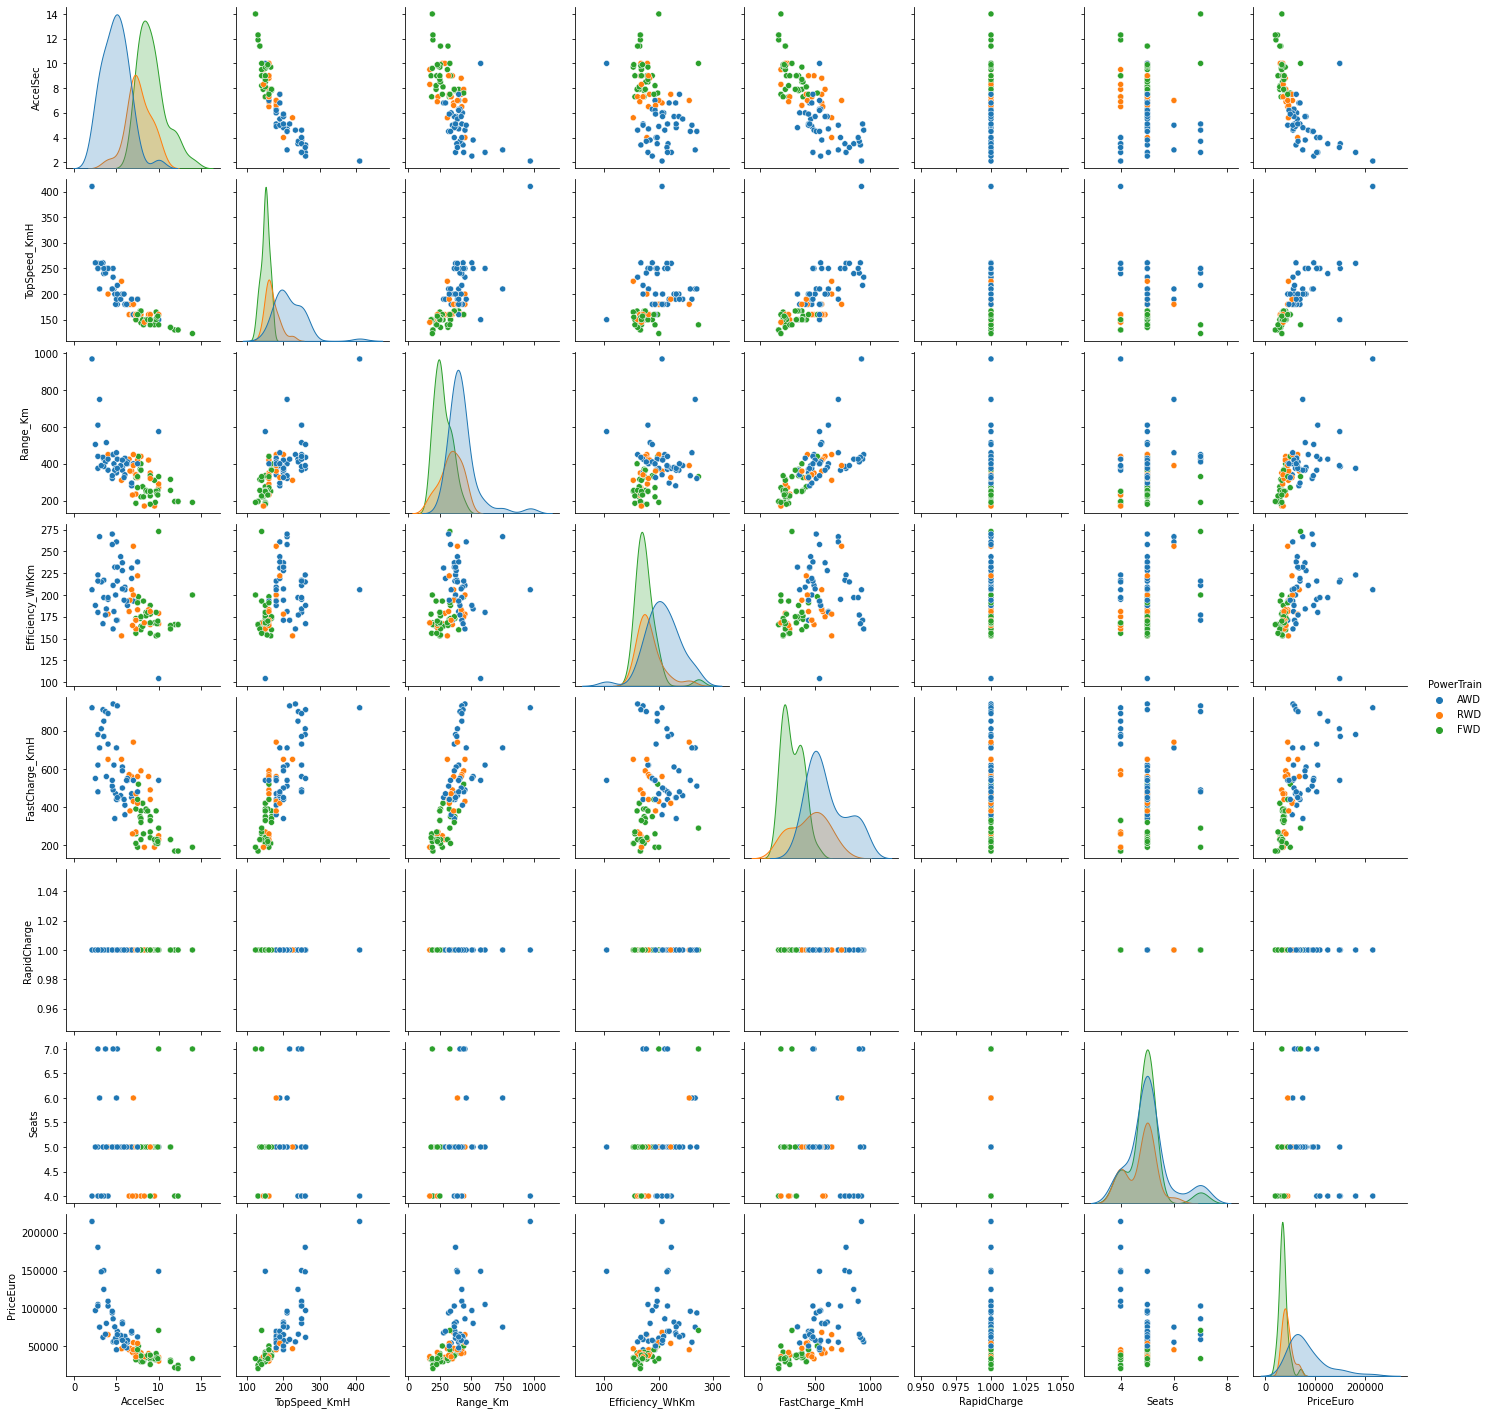

In [12]:
#(H)
sns.pairplot(df, hue="PowerTrain")

In [13]:
#(I)
df.groupby('PowerTrain').mean()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro
PowerTrain,,,,,,,,
AWD,4.887805,216.902439,426.463415,206.756098,605.853659,1.0,5.073171,83840.097561
FWD,9.177778,149.277778,271.250000,175.055556,293.055556,1.0,4.944444,35322.805556
RWD,7.609524,168.333333,336.428571,182.285714,446.190476,1.0,4.761905,43274.000000


<AxesSubplot:xlabel='FastCharge_KmH'>

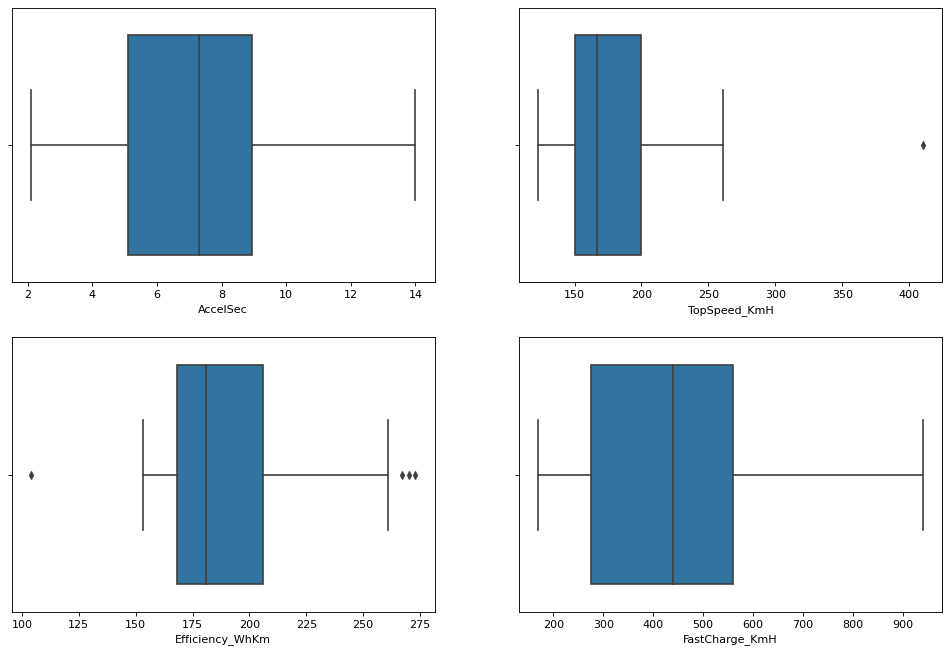

In [14]:
#(J)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi=80)

sns.boxplot(ax=axes[0][0],
            data=df,  
            x = df['AccelSec'], 
            hue = df['PowerTrain']
            )
sns.boxplot(ax=axes[0][1],
            data=df,  
            x = df['TopSpeed_KmH'], 
            hue = df['PowerTrain']
            )
sns.boxplot(ax=axes[1][0],
            data=df,  
            x = df['Efficiency_WhKm'],
            hue = df['PowerTrain']
            )
sns.boxplot(ax=axes[1][1],
            data=df,  
            x = df['FastCharge_KmH'],   
            hue = df['PowerTrain']
            )

In [15]:
#(J)Estatisticamente falando, aquele que tem valores superiores aos outros é a Tração do tipo AWD

-------------------------
## Questão 2: Use um algoritmo de Machine Learning para classificar o tipo de tração do veículo baseado em seus outros parâmetros. Gere a matriz de confusão. A acurácia deve ser maior do que 80%. <font color='red'> (2 pontos) </font>

Adote a metodologia 80/20 de separação treino e teste, e use o parâmetro stratify durante a separação.

In [16]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns = ['PowerTrain', 'RapidCharge', 'Brand','Model','PlugType','BodyStyle', 'Segment']) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = df['PowerTrain'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y)
# O stratify mantem a mesma proporção de exemplos para cada classe


In [17]:
# Instanciando o Escalonador
scaler = StandardScaler()
#scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
Rf = RandomForestClassifier()
Rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [19]:
y_predicoes = Rf.predict(x_test_scaled)

<Figure size 1080x360 with 0 Axes>

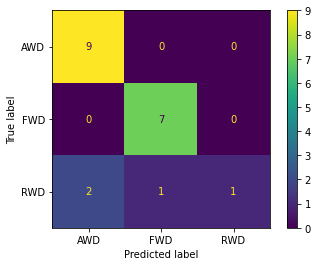

In [20]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['AWD','FWD','RWD'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['AWD','FWD','RWD'])
disp.plot() 

In [21]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

         AWD       0.82      1.00      0.90         9
         FWD       0.88      1.00      0.93         7
         RWD       1.00      0.25      0.40         4

    accuracy                           0.85        20
   macro avg       0.90      0.75      0.74        20
weighted avg       0.87      0.85      0.81        20



-------------------------
## Questão 3: Escolha um algoritmo de Clusterização e explique como ele funciona. Qual a diferença entre Clusterização e Classificação? <font color='red'> (1.75 pontos) </font>


# Resposta:  Agrupamento Hierárquico

é um algoritmo de ligação, em que essas ligações são atreladas entre si, atribuindo todos os pontos de dados a um cluster específico, formando um dendograma. 
Então clusters próximos vão se ligando a um cluster unico, e isso vai se repetindo até que sobre somente um cluster.

Classificação x Clusterização

A primeira diferença é que para classificação é definida a grupos conhecidos previamente, enquanto a clusterização tem a função de tentar descobrir esses grupos. Além disso, Classificação é uma aprendizagem do tipo Superviosinada, enquanto a Clusterização é aprendizado não Superviosanada.

-------------------------
## Questão 4: Use um algoritmo de Machine Learning para predizer o preço do carro  baseado em seus parâmetros. Seu erro absoluto médio deve ser menor do que 10 mil euros. <font color='red'> (1.5 pontos) </font>

Adote a metodologia 80/20 de separação treino e teste.

In [22]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns = ['PriceEuro','PowerTrain', 'RapidCharge', 'Brand','Model','PlugType','BodyStyle', 'Segment']) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = df['PriceEuro'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
# O stratify mantem a mesma proporção de exemplos para cada classe


In [23]:
# Instanciando o Escalonador
scaler = StandardScaler()
#scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(x_train_scaled, y_train) 

DecisionTreeRegressor(random_state=0)

In [25]:
# 3 - Teste da Decision Tree
y_pred_dt = reg_dt.predict(x_test_scaled) # Perceba que estamos passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_pred_dt) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true =  y_test,      # Gabarito
                          y_pred = y_pred_dt) # Respostas do algoritmo ao teste realizado
print('MAE: ',  MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_pred_dt) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

R2:  0.8438111377687635
MAE:  7789.8
MSE:  109054644.4


-------------------------
## Questão 5: Existe uma relação aproximadamente exponecial entre o preço e um dos parâmetros de performance do veículo. Transforme os dados para que seu método preditor dos preços tenha uma MAE < 7 mil euros. Qual a diferença de R² entre a questão 4 e 5? <font color='red'> (1.5 pontos) </font>

Dica: use a operação inversa do exponencial para linearlizar a coluna. Observe que a base natural dos preços cresce na ordem de 10. Use o numpy para chamar a operação em questão. Defina uma função que aplique ela sobre a coluna a ser transformada.

In [26]:
df["PriceEuro"] = df['PriceEuro'].apply(np.log10)

In [27]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns = ['PriceEuro','PowerTrain', 'RapidCharge', 'Brand','Model','PlugType','BodyStyle', 'Segment','Seats']) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = df['PriceEuro'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
# O stratify mantem a mesma proporção de exemplos para cada classe


In [28]:
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()
# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
reg_dt = DecisionTreeRegressor(random_state=2)
reg_dt.fit(x_train_scaled, y_train) 

DecisionTreeRegressor(random_state=2)

In [30]:
# 3 - Teste da Decision Tree
y_pred_dt = reg_dt.predict(x_test_scaled) # Perceba que estamos passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_pred_dt) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = 10 **y_test,      # Gabarito
                          y_pred = 10 **y_pred_dt) # Respostas do algoritmo ao teste realizado
print('MAE: ',  MAE)

R2:  0.9135957911212503
MAE:  6689.949999999999


## R: o R2  da questão 5 é maior, ou seja ele tem uma explicação maior que o da questão 4 sobre os dados, então o modelo tem um ajuste melhor a amostras